In [6]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [7]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [8]:
#n = 20
#lam = 3
#x_i = np.sum(my_data)
#xbar = np.mean(my_data)
#capLam = (lam**n)*e**(-lam*x_i)/(1/xbar)
#capLam

In [9]:
n=20
lam0 = 3
test_stat = -2*log((np.mean(my_data)**n)*(lam0**n)*e**(-lam0*sum(my_data)+n))
1-stats.chi2.cdf(test_stat,1)

0.029827229194775096

In [10]:
print(test_stat)
print((np.mean(my_data)**n)*(lam0**n)*e**(-lam0*sum(my_data)+n))

4.719222360188462
0.09445694279678139


pval is near 0.03, therefore reject H0 and conclue it is not equal to 3

#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [11]:
crit = stats.chi2.ppf(0.95,1)
crit

3.841458820694124

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [12]:
n= 50
lam0 = 3

ts=[]

for _ in np.arange(10000):
    my_data = stats.expon.rvs(size=n,scale = 1/5)
    test_stat = -2*log((np.mean(my_data)**n)*(lam0**n)*e**(-lam0*sum(my_data)+n))
    ts = np.append(ts,test_stat)

np.mean(ts>=crit)

0.953

Repeat for a sample size of 50. What do you expect to happen to power? 

Sample size goes up, power goes up

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

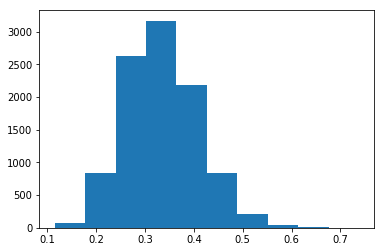

0.0354

In [17]:
n=20
ts3=[np.mean(stats.expon.rvs(scale=1/3,size=n)) for _ in np.arange(10000)]
np.mean(my_data)
plt.hist(ts3)
plt.show()
2*np.mean(ts3<=np.mean(my_data))

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [20]:
critL,critU=percentile([2.5,97.5],ts3)

Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [21]:
ts5=[np.mean(stats.expon.rvs(scale=1/5,size=n)) for _ in np.arange(10000)]
np.mean(ts5>=critU) + np.mean(ts5<=critL)

0.5675

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [22]:
n=50
ts3=[np.mean(stats.expon.rvs(scale=1/3,size=n)) for _ in np.arange(10000)]
critL,critU=percentile([2.5,97.5],ts3)
ts5=[np.mean(stats.expon.rvs(scale=1/5,size=n)) for _ in np.arange(10000)]
np.mean(ts5>=critU) + np.mean(ts5<=critL)

0.9456